In [71]:
import pandas as pd
import numpy as np
from scipy import stats
import math
from pydataset import data
from env import get_db_url
from matplotlib import pyplot as plt
import seaborn as sns

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like.



- **Is the website redesign any good?**

>**H<sub>o</sub>:** website redesign is not good, click rate has no significant change
>
>>False Negative **(type II error)** Click rate has not changed, but another metric has improved that we're not tracking
>
>**H<sub>a</sub>:** website redesign is good, click rate has significantly improved
>
>>False Positive **(type I error)** Click rate has signifaicantly improved but not due to website redesign


- **Is our television ad driving more sales?**

>**H<sub>o</sub>:** Ad has no effect on sales, no significant increase
>
>>False Negative **(type II error)** sales have not risen, but due to other causes
>
>**H<sub>a</sub>:** Ad has boosted sales
>
>>False Positive **(type I error)** Sales have risen, but due to other causes

- **Has the network latency gone up since we switched internet service providers?**

>**H<sub>o</sub>:** Network latency has not been affected by new internet provider
>
>>False Negative **(type II error)** latency has risen but measurment device is not working
>
>**H<sub>a</sub>:** Network latency has risen significantly
>
>>False Positive **(type I error)** latency has not risen but measurment device is not working

# T-tests

- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [3]:
#metrics
dist_1 = stats.norm(90, 15).rvs(40)
dist_2 = stats.norm(100,20).rvs(50)

n1 = 40
n2 = 50

μ1 = 90
μ2 = 100

σ1 = 15
σ2 = 20

alpha = .05

In [4]:
#two sample t-test
#h0: time1 = time2
#ha: time1 ≠ time2
deg_f = n1 + n2 - 2
σ_pool = math.sqrt(((n1 - 1)*(σ1 ** 2) + (n2 - 1)*(σ2 ** 2)) / (deg_f))

t = (μ1 - μ2) / (σ_pool * math.sqrt(1/n1 + 1/n2))
t

-2.6252287036468456

In [5]:
p = stats.t(deg_f).cdf(t)
p

0.005104926224619695

In [6]:
p > alpha

False

### Load the mpg dataset and use it to answer the following questions:


In [7]:
mpg = data('mpg')

In [8]:
mpg['avg_mpg'] = (mpg.hwy+mpg.cty)/2

In [9]:
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [10]:
volks_hwy_mpg = mpg[mpg['manufacturer'] == 'volkswagen'].hwy
volks_hwy_mpg
stats.ttest_1samp(volks_hwy_mpg, mpg.hwy.mean())

Ttest_1sampResult(statistic=5.652041311757083, pvalue=6.068818710469792e-06)

In [11]:
compact_mpg = mpg[mpg['class'] == 'compact'].cty
midsize_mpg = mpg[mpg['class'] == 'midsize'].cty
stats.ttest_ind(compact_mpg, midsize_mpg)

Ttest_indResult(statistic=2.2845195147123536, pvalue=0.024803276085898066)

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [12]:
μ = mpg.groupby('year').avg_mpg.mean()
σ = mpg.groupby('year').avg_mpg.std()
n = mpg.groupby('year').avg_mpg.count()

In [13]:
#Ho: mu_2008 == mu_1999
#Ha: mu_2008 != mu_1999
deg_f = n[1999] + n[2008] - 2
σ_pool = math.sqrt(((μ[1999] - 1)*(σ[1999] ** 2) + (μ[2008] - 1)*(σ[2008] ** 2)) / (deg_f))

t = (μ[1999] - μ[2008]) / (σ_pool * math.sqrt(1/n[1999] + 1/n[2008]))
t

0.5404265072353494

In [14]:
p = stats.t(deg_f).cdf(t)
p

0.7052893195269174

- Are compact cars more fuel-efficient than the average car?

In [15]:
#ho: compact_mpg <= avg_mpg
#ha: compact_mpg >  avg_mpg

In [16]:
μ_all = mpg.avg_mpg.mean()
σ_all = mpg.avg_mpg.std()
n_all = mpg.avg_mpg.count()

μ_com = mpg[mpg['class'] == 'compact'].avg_mpg.mean()
σ_com = mpg[mpg['class'] == 'compact'].avg_mpg.std()
n_com = mpg[mpg['class'] == 'compact'].avg_mpg.count()


In [17]:
deg_f = n_com + n_all - 2
σ_pool = math.sqrt(((μ_com - 1)*(σ_com ** 2) + (μ_all - 1)*(σ_all ** 2)) / (deg_f))

t = (μ_com - μ_all) / (σ_pool * math.sqrt(1/n_com + 1/n_all))
t

15.22973882764796

In [18]:
p = stats.t(deg_f).cdf(t)
p

1.0

- Do manual cars get better gas mileage than automatic cars?

In [19]:
#Ho: standard mpg = automatic mpg
#Ha: standard mpg > automatic mpg
mpg['simple_trans'] = mpg.trans.str.startswith('manual')
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,simple_trans
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,False
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,True
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,True
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,False
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,False


In [20]:
μ = mpg.groupby('simple_trans').avg_mpg.mean()
σ = mpg.groupby('simple_trans').avg_mpg.std()
n = mpg.groupby('simple_trans').avg_mpg.count()

In [21]:
deg_f = n[True] + n[False] - 2
σ_pool = math.sqrt(((μ[True] - 1)*(σ[False] ** 2) + (μ[True] - 1)*(σ[False] ** 2)) / (deg_f))

t = (μ[True] - μ[False]) / (σ_pool * math.sqrt(1/n[True] + 1/n[False]))
t

11.107655934792621

In [22]:
p = stats.t(deg_f).cdf(t)
p

1.0

# Correlation



### Class Example
 - is there a correlation between city mpg and displacement?
 - $H_o$ there is a correleation
 - $H_a$ there is no correlation

In [23]:
mpg = data('mpg')
stats.pearsonr(mpg['cty'], mpg['displ'])

(-0.7985239689348551, 4.737914890205637e-53)

### Use the telco_churn data.


In [24]:
#get db url
url = get_db_url('telco_churn')
telco = pd.read_sql('''
    SELECT customer_id, tenure, monthly_charges, total_charges, churn, phone_service as phone, internet_service_type_id as internet
    FROM customers''',
    url)
telco['internet'] = ((telco.internet == 1) | (telco.internet == 2))
telco['phone_and_internet'] = (telco.internet) & (telco.phone)
telco.sort_values('total_charges').tail(7032).head(5)

,customer_id,tenure,monthly_charges,total_charges,churn,phone,internet,phone_and_internet
4386,6180-YBIQI,5,24.30,100.2,No,No,True,True
2222,3178-FESZO,1,100.25,100.25,Yes,Yes,True,True
1771,2587-YNLES,6,20.10,100.35,No,Yes,False,False
5542,7802-EFKNY,5,24.95,100.4,Yes,No,True,True
5126,7216-EWTRS,1,100.80,100.8,Yes,Yes,True,True


- Does tenure correlate with monthly charges? 

In [25]:
x = telco.tenure
y = telco.monthly_charges
corr, p = stats.pearsonr(x,y)
{'correlation': corr, 'probability' : p}

{'correlation': 0.24789985628615002, 'probability': 4.0940449915016345e-99}

- Total charges?


In [26]:
no_null_telco = telco.sort_values('total_charges').tail(7032)
x = no_null_telco.tenure
y = no_null_telco.total_charges.apply(float)
corr, p = stats.pearsonr(x,y)
{'correlation': corr, 'probability' : p}

{'correlation': 0.825880460933202, 'probability': 0.0}

- What happens if you control for phone and internet service?

In [27]:
x = telco[telco['phone_and_internet'] == True].tenure
y = telco[telco['phone_and_internet'] == True].monthly_charges
corr, p = stats.pearsonr(x,y)
{'correlation': corr, 'probability' : p}

{'correlation': 0.3723066263198703, 'probability': 5.890963580482675e-181}

In [28]:
x = no_null_telco[no_null_telco['phone_and_internet'] == True].tenure
y = no_null_telco[no_null_telco['phone_and_internet'] == True].total_charges.apply(float)
corr, p = stats.pearsonr(x,y)
{'correlation': corr, 'probability' : p}

{'correlation': 0.9319346187418098, 'probability': 0.0}

### Use the employees database.

In [29]:
url = get_db_url('employees')
emp_sal = pd.read_sql(
'''
SELECT e.emp_no, DATEDIFF(now(), e.hire_date) as tenure, s.salary
FROM employees as e
JOIN salaries as s
USING(emp_no)
WHERE to_date > now()
''', url)
emp_sal.head(5)

,emp_no,tenure,salary
0,10001,12157,88958
1,10002,12374,72527
2,10003,12094,43311
3,10004,11999,74057
4,10005,10983,94692


- Is there a relationship between how long an employee has been with the company and their salary?


In [30]:
x = emp_sal.tenure
y = emp_sal.salary
corr, p = stats.pearsonr(x,y)
{'correlation': corr, 'probability' : p}

{'correlation': 0.30646256131860783, 'probability': 0.0}

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [31]:
emp_titles = pd.read_sql('SELECT emp_no, title FROM titles', url)
emp_titles = emp_titles.groupby('emp_no').count().head(5)

In [32]:
df = pd.merge(emp_sal, emp_titles, how = 'inner', on = 'emp_no')
df.head(5)

,emp_no,tenure,salary,title
0,10001,12157,88958,1
1,10002,12374,72527,1
2,10003,12094,43311,1
3,10004,11999,74057,2
4,10005,10983,94692,2


In [33]:
stats.pearsonr(df.title, df.salary)

(0.44208391033620664, 0.45603498012258536)

### Use the sleepstudy data. Is there a relationship between days and reaction time?

- $H_o$ Days correlate with reaction time
- $H_a$ There is no apparent correlation

In [34]:
ssd = data('sleepstudy')
ssd.head(5)

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [35]:
stats.pearsonr(ssd.Reaction, ssd.Days)

(0.5352302262650253, 9.894096322214812e-15)

# Chi Squared



### Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [36]:
index = ['macbook', 'no_Macbook']
columns = ['student', 'not_student']

observed = pd.DataFrame([[49, 20],[1, 30]], index = index, columns = columns)
observed

,student,not_student
macbook,49,20
no_Macbook,1,30


In [37]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

chi2, p

(36.65264142122487, 1.4116760526193828e-09)

### Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

- $H_o:$ Manufacturer has no effect on prevalence of transmissions
- $H_a:$ Volkswagens manufacture more manual transmission vehicles than Audi

In [38]:
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [39]:
audi_auto = mpg[(mpg.manufacturer == 'audi')&(mpg.trans.str.startswith('auto'))].trans.count()
audi_manual = mpg[(mpg.manufacturer == 'audi')&(mpg.trans.str.startswith('manual'))].trans.count()
volkswagen_auto = mpg[(mpg.manufacturer == 'volkswagen')&(mpg.trans.str.startswith('auto'))].trans.count()
volkswagen_manual = mpg[(mpg.manufacturer == 'volkswagen')&(mpg.trans.str.startswith('manual'))].trans.count()

observed = pd.DataFrame([[audi_auto, audi_manual], [volkswagen_auto,volkswagen_manual]], columns = ['auto', 'manual'], index = ['audi', 'volkswagen'])
observed

,auto,manual
audi,11,7
volkswagen,13,14


In [40]:
stats.chi2_contingency(observed)

(0.3013392857142859, 0.5830440246512352, 1, array([[ 9.6,  8.4],
        [14.4, 12.6]]))

- $H_o:$ Transmission has no effect on mileage
- $H_a:$ maunal transmissions have higher mileages

In [41]:
df = mpg[['trans', 'cty', 'hwy']]
df['avg_mpg'] = (df.cty+df.hwy)/2
df['good_mpg'] = df.avg_mpg >= 25

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
good_auto = df[df.trans.str.startswith('auto')& df.good_mpg].trans.count()
good_manual = df[df.trans.str.startswith('manual')& df.good_mpg].trans.count()
bad_auto = df[df.trans.str.startswith('auto')& ~df.good_mpg].trans.count()
bad_manual = df[df.trans.str.startswith('manual')& ~df.good_mpg].trans.count()

observed = pd.DataFrame([[good_auto, good_manual], [bad_auto, bad_manual]], index = ['good_mpg','bad_mpg'], columns = ['auto', 'manual'])
observed

,auto,manual
good_mpg,17,26
bad_mpg,140,51


In [43]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

chi2, p

(16.625694591485967, 4.553001057526927e-05)

# Extra Exercises

### From Zach's kisckstarter dataset

In [95]:
df = pd.read_csv('kickstarter.csv')
df['funded percentage'].rename('fund_amt', inplace = False)
df.head(5)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesabath/while-the-trees-sleep,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/education-enrichment-via-a-custom-online...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/strum-an-animated-short-film,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally know his father.,http://www.kickstarter.com/projects/charnick/getting-over-one-sons-search-to-finally-k...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500,$1,000,$5,000",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Name In Fashion&quot;,http://www.kickstarter.com/projects/flyegrlroyalty/the-launch-of-flyegrlroyalty-the-ne...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
project id           45957 non-null int64
name                 45957 non-null object
url                  45957 non-null object
category             45957 non-null object
subcategory          45957 non-null object
location             44635 non-null object
status               45957 non-null object
goal                 45957 non-null float64
pledged              45945 non-null float64
funded percentage    45957 non-null float64
backers              45957 non-null int64
funded date          45957 non-null object
levels               45957 non-null int64
reward levels        45898 non-null object
updates              45957 non-null int64
comments             45957 non-null int64
duration             45957 non-null float64
dtypes: float64(4), int64(5), object(8)
memory usage: 6.0+ MB


- $H_o$ number of updates has no effect on success of campaigns
- $H_a$ more updates is charicteristic of successful campaigns

In [58]:
complete_projects = df[(df.status == 'successful')|(df.status == 'failed')][['name', 'status', 'updates']]
successful_updates = complete_projects[complete_projects['status'] == 'successful'].updates
stats.ttest_1samp(successful_updates, complete_projects.updates.mean())

Ttest_1sampResult(statistic=46.187766070654796, pvalue=0.0)

In [62]:
successful_updates.std()

7.7091634123019315

In [63]:
complete_projects.updates.std()

6.6291815764203905

(0, 20)

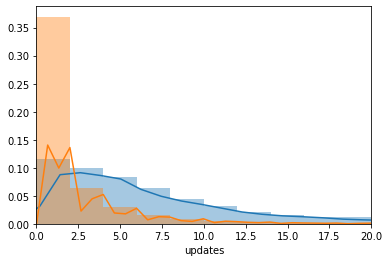

In [77]:
sns.distplot(successful_updates, bins = [0,2,4,6,8,10,12,14,16,18,20])
sns.distplot(complete_projects[complete_projects.status == 'failed'].updates, bins = [0,2,4,6,8,10,12,14,16,18,20])
plt.xlim(0,20)

- $H_o$ updates has no effect on percent funded
- $H_a$ updates affects percent funding

In [105]:
#remove outlayers
new_df = df[df['funded percentage'] < 5]
new_df.apply(len)

project id           45532
name                 45532
url                  45532
category             45532
subcategory          45532
location             45532
status               45532
goal                 45532
pledged              45532
funded percentage    45532
backers              45532
funded date          45532
levels               45532
reward levels        45532
updates              45532
comments             45532
duration             45532
dtype: int64

In [106]:
stats.pearsonr(new_df.updates, new_df['funded percentage'])

(0.40641017172651805, 0.0)

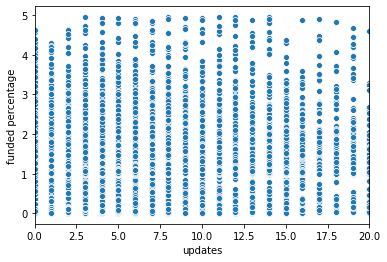

In [114]:
plt.xlim(0,20)
sns.scatterplot(new_df.updates, new_df['funded percentage'])